<a href="https://colab.research.google.com/github/vkdan007/open/blob/main/%22lab-04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Занятие 4.  
1. Мульти-индексы в pandas  
2. Деление урана

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Мульти-индексы

In [ ]:
bad_cols_df = pd.DataFrame(np.array([1,2,3]), columns=[['bad01']])
bad_cols_df

,bad01
0,1
1,2
2,3


In [ ]:
# тип колонок
type(bad_cols_df.columns)

pandas.core.indexes.multi.MultiIndex

In [ ]:
# значения датафрейма
bad_cols_df["bad01"].values

array([[1],
       [2],
       [3]])

In [ ]:
# замена типа колонок
bad_cols_df.columns = ['bad01']

In [ ]:
# тип колонок
type(bad_cols_df.columns)

pandas.core.indexes.base.Index

In [ ]:
# значения датафрейма
bad_cols_df['bad01'].values

array([1, 2, 3])

In [ ]:
# датафрейм с двухуровневыми колонками
multi_indexed_cols_df = pd.DataFrame(data=np.random.uniform(0, 1, (2, 6)),
                                     columns = [['a', 'a', 'b', 'b', 'c', 'c'],
                                                [1, 2, 1, 2, 1, 2]])
multi_indexed_cols_df

a                   b                   c          
          1         2         1         2         1         2
0  0.555787  0.049803  0.495003  0.064998  0.412467  0.767522
1  0.185464  0.680116  0.782304  0.379188  0.550276  0.825694

In [ ]:
# тип колонок
type(multi_indexed_cols_df.columns)

pandas.core.indexes.multi.MultiIndex

In [ ]:
# обращение к значению в колонке
multi_indexed_cols_df['b'][2]

,2
0,0.064998
1,0.379188


In [ ]:
# датафрейм с признаками разных типов
df_to_group = pd.DataFrame({
    "categorial_col": ["red"]*2 + ["green"]*3,
    "boolean_col" :[True, False, True, False, True],
    "float_col" : np.random.normal(0, 1, (5,))
})
df_to_group

,categorial_col,boolean_col,float_col
0,red,True,0.951922
1,red,False,-0.638600
2,green,True,-0.453881
3,green,False,-0.855352
4,green,True,-1.809048


In [ ]:
# группировка данных по булеву и категориальному признакам
sum_of_group = df_to_group.groupby(by=["boolean_col", "categorial_col"]).sum()
sum_of_group

float_col
boolean_col categorial_col           
False       green           -0.855352
            red             -0.638600
True        green           -2.262929
            red              0.951922

In [ ]:
type(sum_of_group.index), type(sum_of_group.columns)

(pandas.core.indexes.multi.MultiIndex, pandas.core.indexes.base.Index)

In [ ]:
# транспонирование полученного датафрейма и замена уровней мульти-индекса
sum_of_group.T

boolean_col        False             True           
categorial_col     green     red     green       red
float_col      -0.855352 -0.6386 -2.262929  0.951922

In [ ]:
sum_of_group.T.rename(index={"float_col": "sum"})

boolean_col        False             True           
categorial_col     green     red     green       red
sum            -0.855352 -0.6386 -2.262929  0.951922

In [ ]:
sum_of_group = sum_of_group.T.rename(index={"float_col": "sum"})
sum_of_group = sum_of_group.swaplevel(axis=1)
sum_of_group

categorial_col,green,red,green,red
boolean_col,False,False,True,True
sum,-0.855352,-0.6386,-2.262929,0.951922


In [ ]:
sum_of_group.columns

MultiIndex([('green', False),
            (  'red', False),
            ('green',  True),
            (  'red',  True)],
           names=['categorial_col', 'boolean_col'])

In [ ]:
# просмотр названий колонок по уровням
sum_of_group.columns.get_level_values(0), sum_of_group.columns.get_level_values(1)

(Index(['green', 'red', 'green', 'red'], dtype='object', name='categorial_col'),
 Index([False, False, True, True], dtype='bool', name='boolean_col'))

In [ ]:
# переименование колонок
sum_of_group.columns.set_names(['color', 'flag'], inplace=True)

In [ ]:
sum_of_group

color,green,red,green,red
flag,False,False,True,True
sum,-0.855352,-0.6386,-2.262929,0.951922


## К вопросу о делении урана

In [ ]:
!pip install mendeleev

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import sys
sys.path.append('/content/drive/MyDrive')
from plot_function import from_3_lab


In [ ]:
np_vs_nn = np.load(f"/content/drive/MyDrive/Np_vs_Nn.npy")
isotopes = pd.read_pickle(f"/content/drive/MyDrive/isotope_params2.pkl")


In [ ]:

uranium_nn, uranium_np = np.array([142, 143, 146]), np.array([92, 92, 92])
uranium_en_binding =isotopes.loc[(isotopes["Z"]==92) & (isotopes["abundance"])]



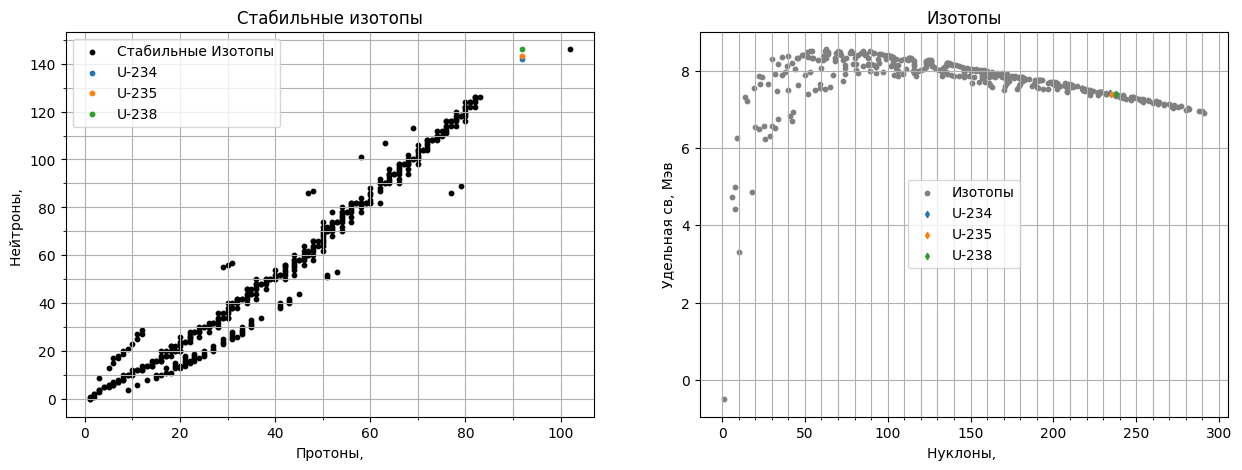

In [ ]:
import matplotlib.pyplot as plt
fig, axs = from_3_lab(np_vs_nn, isotopes, uranium_np, uranium_nn,uranium_en_binding )

1. Соотношение числа нейтронов и протонов для легких и тяжелых ядер различается.  
2. Энергию можно получить путем слияния легких ядер или делением тяжелых (достаточно широкий максимум $\frac{E_{св}}{нуклон}$).

#### Деление урана нейтронами

<div>
<img src="https://drive.google.com/uc?export=view&id=18LvI1fJR8gS6RLGnjvnMgISa5bAfXBPI" height="650"/>
</div>

Пример цепочки распада осколков деления урана (выход 6.9%):
$_{54}^{140}Xe \rightarrow _{55}^{140}Cs  \rightarrow _{56}^{140}Ba \rightarrow _{57}^{140}La \rightarrow _{58}^{140}Ce$

Посчитайте энергию, высвобождающуюся в данной реакции $_{92}^{235}U + _0^1n \rightarrow _{57}^{147}La + _{35}^{87}Br+2_0^1n$

1. Вычислите разность масс частиц до и после реакции в а.е.м.  
2. Вычислите энергию, эквивалентную массе, полученной в п.1 из расчета 1 а.е.м ~ 931 МэВ

In [ ]:
m_n = 1.00897 # масса нейтрона в а.е.м.
def released_energy(input_masses: np.array, output_masses: np.array):
  '''
  Вычисление высвобождающейся энергии при делении.
    Параметры:
    - input_masses (np.array): массы частиц в а.е.м, вступающих в реакцию
    - output_masses (np.array): массы частиц в а.е.м, продуктов реакции

    Выход: высвобождающаяся энергия в МэВ
  '''
  dm = input_masses.sum() - output_masses.sum() #аем
  aem_to_mev = 931
  assert dm >= 0
  return dm * aem_to_mev

In [ ]:
isotopes["abundance"] = isotopes["Iso"].apply(func=lambda x: True if x.abundance is not None else False)
uranium_en_binding = isotopes.loc[(isotopes["Z"]==92) & (isotopes["abundance"])]
uranium_en_binding

,Iso,Z,A,N,mass,del_m,Ecv,Eud,abundance
3122,"atomic_number= 92, mass_number= 234, mass=2...",92,234,142,234.040950,3.090002e-27,1735.764816,7.417798,True
3123,"atomic_number= 92, mass_number= 235, mass=2...",92,235,143,235.043928,3.099457e-27,1741.076212,7.408835,True
3126,"atomic_number= 92, mass_number= 238, mass=2...",92,238,146,238.050787,3.131268e-27,1758.945552,7.390528,True


In [ ]:
# Массы частиц
input_masses = np.array([235.043928, 1.00866])
output_masses = np.array([138.9055, 79.904, 2 * 1.00866])

ans = released_energy(input_masses, output_masses)
print(f'В реакции высвобождается {ans:.3f} МэВ энергии')

В реакции высвобождается 14175.190 МэВ энергии


<div>
<img src="https://drive.google.com/uc?export=view&id=1TnbHiQUzQ0aZCeFo9yNVZmFD6wsgY943" height="200"/>
</div>  

#### U-235 vs. U-238

In [ ]:
from mendeleev import element

In [ ]:
U_isotopes = element('U').isotopes
for i, iso in enumerate(U_isotopes):
    if iso.abundance is not None:
      print(f'U-{iso.atomic_number}, распространенность в природе  - {iso.abundance:.2f}%; mass: {iso.mass} iso.mass')

U-92, распространенность в природе  - 0.01%; mass: 234.040950296 iso.mass
U-92, распространенность в природе  - 0.72%; mass: 235.043928117 iso.mass
U-92, распространенность в природе  - 99.27%; mass: 238.050786936 iso.mass


$^{238}_{92}U +\ ^{1}_{0}n →\ ^{239}_{92}U →\ ^{239}_{93}Np →\ ^{239}_ {94}Pu$

In [ ]:
# aem_to_mev = 931
# input_masses = np.array([238-92 , 1.00866])
# output_masses = np.array([239-92])
# first = released_energy(input_masses, output_masses)
# print(f'В первой реакции высвобождается {first*931:.3f} МэВ энергии')

# input_masses=np.array([239-92])
# output_masses = np.array([239-93])
# second = released_energy(input_masses, output_masses)
# print(f'Во второй реакции высвобождается {second:.3f} МэВ энергии')


# input_masses=np.array(239-93)
# output_masses = np.array([23-949])
# third = released_energy(input_masses, output_masses)

# print(f'В третьей реакции высвобождается {third:.3f} МэВ энергии')

# total = first + second + third
#input_masses = np.array([238.050787 , 1.00866])
#output_masses = np.array([244.06])
#globalTotal = released_energy(input_masses, output_masses)
# assert abs(total - globalTotal) < 1e6

#print(f'Всего в реакции высвобождается {globalTotal:.3f} МэВ энергии')

Источники:  
1. Глесстон, Эдмунд Основы теории ядерных реакторов. М.:ИЛ, 1954.  
2. Климов Ядерная физика и ядерные реакторы. М.:Энергоатомиздат, 1985.